## ECE 4800: Plotting 2D and 3D Vector Fields

Many other examples can be found at
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [2]:
# Numpy is python's library for vector math and MATLAB-like computation
import numpy as np 

# Matplotlib is python's plotting library
import matplotlib.pyplot as plt   
from matplotlib import cm

# Matplotlib's 3D plotting library
from mpl_toolkits.mplot3d import Axes3D 

# The notebook directive allows us to rotate 3D graphs, and save graphs
%matplotlib notebook  

C:\Users\amarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\amarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\amarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\amarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


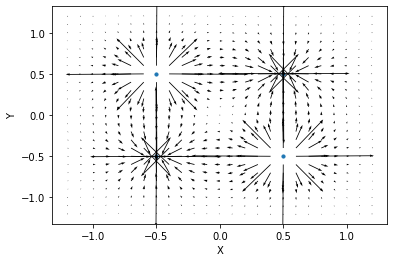

In [4]:
# Example of 2D Vector plot
xl = np.linspace(-1.2,1.2,25)  # Create equally spaced vectors in X
yl = np.linspace(-1.2,1.2,25)  # Create equally spaced vectors in Y
x,y = np.meshgrid(xl, yl)  # Create a set of two separate 2D matrices, which indicate the x and y location 

r1 = np.array([-0.5,0.5])
r2 = np.array([0.5, 0.5])
r3 = np.array([0.5,-0.5])
r4 = np.array([-0.5, -0.5])

q1 = 1
q2 = -1
q3 = 1
q4 = -1

u = np.zeros(x.shape)
v = np.zeros(x.shape)
rows, cols = x.shape
for i in range(rows):
    for j in range(cols):
        u[i,j] = 1/(4*np.pi*8.85e-12) * \
            (q1*(x[i,j]-r1[0])/np.sqrt((x[i,j]-r1[0])**2 + (y[i,j]-r1[1])**2)**3 + \
             q2*(x[i,j]-r2[0])/np.sqrt((x[i,j]-r2[0])**2 + (y[i,j]-r2[1])**2)**3 + \
             q3*(x[i,j]-r3[0])/np.sqrt((x[i,j]-r3[0])**2 + (y[i,j]-r3[1])**2)**3 + \
             q4*(x[i,j]-r4[0])/np.sqrt((x[i,j]-r4[0])**2 + (y[i,j]-r4[1])**2)**3)
             #+ q2*(x[i,j]-r2[0])/(np.linalg.norm(x-r2[0]))**3 \
             #+ q3*(x[i,j]-r3[0])/(np.linalg.norm(x-r3[0]))**3)
        v[i,j] = 1/(4*np.pi*8.85e-12) * \
            (q1*(y[i,j]-r1[1])/np.sqrt((x[i,j]-r1[0])**2 + (y[i,j]-r1[1])**2)**3 + \
             q2*(y[i,j]-r2[1])/np.sqrt((x[i,j]-r2[0])**2 + (y[i,j]-r2[1])**2)**3 + \
             q3*(y[i,j]-r3[1])/np.sqrt((x[i,j]-r3[0])**2 + (y[i,j]-r3[1])**2)**3 + \
             q4*(y[i,j]-r4[1])/np.sqrt((x[i,j]-r4[0])**2 + (y[i,j]-r4[1])**2)**3)

plt.figure()  # Create a figure
plt.scatter([r1[0], r2[0], r3[0], r4[0]], [r1[1], r2[1], r3[1], r4[1]], s=10)
plt.quiver(x,y,u,v)  # Make the vector plot
plt.xlabel('X')  # Label the x axis
plt.ylabel('Y')  # Label the y axis
plt.show()  # Show the plot

C:\Users\amarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


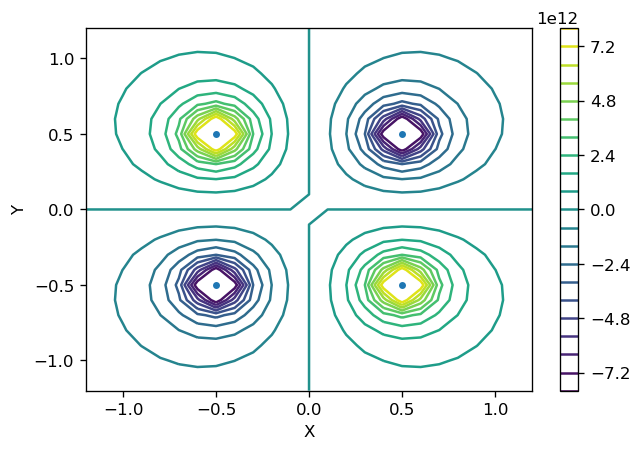

In [31]:
# 2D vector plot of electrostatic potential

# Create a 2D grid
xl = np.linspace(-1.2,1.2,25)  # Create equally spaced vectors in X
yl = np.linspace(-1.2,1.2,25)  # Create equally spaced vectors in Y
x,y = np.meshgrid(xl, yl)  # Create a set of two separate 2D matrices, which indicate the x and y location 

# A quaduropole has 4 charges arrange in a square
# Define the locations and charges here
r1 = np.array([-0.5,0.5])
r2 = np.array([0.5, 0.5])
r3 = np.array([0.5,-0.5])
r4 = np.array([-0.5, -0.5])

q1 = 1
q2 = -1 #-1
q3 = 1 # 1 
q4 = -1 # -1

# Calculate the electrostatic potential at each point
V = 1/(4*np.pi*8.85e-14)*(  q1/(np.sqrt((x-r1[0])**2 + (y-r1[1])**2)) 
                          + q2/(np.sqrt((x-r2[0])**2 + (y-r2[1])**2))
                          + q3/(np.sqrt((x-r3[0])**2 + (y-r3[1])**2))
                          + q4/(np.sqrt((x-r4[0])**2 + (y-r4[1])**2))
                          )

spacing = 1.2*2/25  # spacing between points
u, v = np.gradient(V)
plt.figure(dpi=120)  # Create a figure
# Plot the locations of the charges
plt.scatter([r1[0], r2[0], r3[0], r4[0]], [r1[1], r2[1], r3[1], r4[1]], s=10)
# Make a Contour plot of the electrostatic potential
plt.contour(x, y, V, levels=20)
plt.colorbar()
#plt.quiver(x,y,V,0)  # Make the vector plot
plt.xlabel('X')  # Label the x axis
plt.ylabel('Y')  # Label the y axis
plt.show()  # Show the plot

In [ ]:
xy = np.dstack((x,y))


a = (xy-r1)/np.linalg.norm(xy-r1, axis=2)**3

print(a.shape)
return

E = 1/(4*np.pi*8.85e-12) * \
    (q1*(xy-r1)/(np.linalg.norm(xy, axis=2)**3)) + \
    (q2*(xy-r2)/(np.linalg.norm(xy, axis=2)**3)) + \
    (q3*(xy-r3)/(np.linalg.norm(xy, axis=2)**3))

print(E)
return


In [ ]:
# Example of 3D Vector plot

# Create a 3D meshgrid, similar to how we created a 2D one earlier
N = 5  # Change this to a smaller number to get fewer arrows, and vice versa
xl = np.linspace(-1,1,N)
yl = np.linspace(-1,1,N)
zl = np.linspace(-1,1,N)
x,y,z = np.meshgrid(xl, yl, zl)

# Define the vector field in the xhat, yhat, and zhat directions
u = x
v = y
w = z

# Create a 3D plot.  Note that the way we create 3D plots is slightly different than 2D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.2)
ax.set_xlabel('X')  # Label the x axis
ax.set_ylabel('Y')  # Label the y axis
ax.set_zlabel('Z')  # Label the z axis
plt.show()

# You can rotote it with the left mouse button!